Projections - IPCC AR6, ch 5: https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter05.pdf

we have these scenarios for the future, and betas from CMIP6, so we should be able to tell what the ocean sink is in the future

also pull in a temperature time series, many models, and calculate alpha!

we will have to impose an atmosphere/temp at first: concentration scenario, as opposed to an emission-driven feedback loop

In [127]:
import pandas as pd
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget 
# ^ allows zooming in to the plots!

import cmocean as cm    

import gcsfs
fs = gcsfs.GCSFileSystem()

%run plotting_functions.ipynb

Note: you may need to restart the kernel to use updated packages.


In [144]:
ipcc_feedback = pd.read_csv('data/ipcc_feedback_factors.csv')

In [145]:
beta_land = ipcc_feedback['β_Land (PgC ppm⁻¹)']
gamma_land = ipcc_feedback['γ_Land (PgC K⁻¹)']
beta_ocean = ipcc_feedback['β_Ocean (PgC ppm⁻¹)']
gamma_ocean = ipcc_feedback['γ_Ocean (PgC K⁻¹)']

## surface temperature scenarios plot

In [181]:
ssp_temps = pd.read_csv('data/scenario_temperatures.csv')
# to get the scenario name out of the data
ssp_temps.index = ssp_temps['Scenario']
ssp_temps = ssp_temps.drop(columns=['Scenario'])
years = np.array(ssp_temps.keys())

scenarios = ['ssp119','ssp126','ssp245','ssp370','ssp434-over','ssp585']

temp119 = ssp_temps.loc[scenarios[0]]
temp126 = ssp_temps.loc[scenarios[1]]
temp245 = ssp_temps.loc[scenarios[2]]
temp370 = ssp_temps.loc[scenarios[3]]
temp434 = ssp_temps.loc[scenarios[4]]
temp585 = ssp_temps.loc[scenarios[5]]

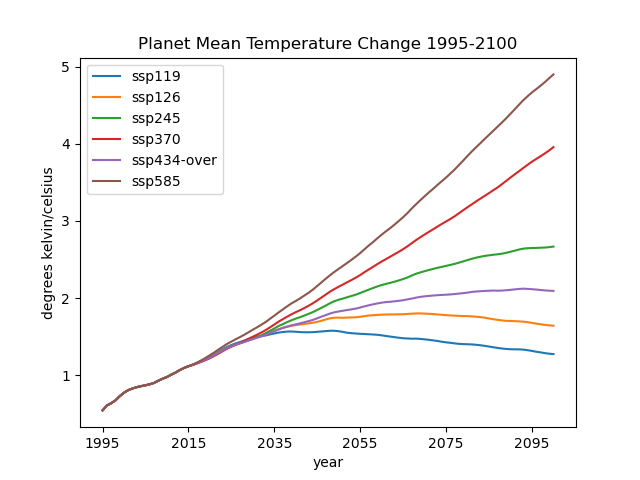

In [183]:
plt.figure()
plt.xlabel('year')
plt.ylabel('degrees kelvin/celsius')
plt.title('Planet Mean Temperature Change 1995-2100')

plt.xticks(ticks=[0,20,40,60,80,100],labels=years[::20]);

for no,t_array in enumerate([temp119,temp126,temp245,temp370,temp434,temp585]):
    plt.plot(years,t_array,label=scenarios[no])

plt.legend()

## atmospheric co2 scenarios plot

In [184]:
ssp_xco2 = pd.read_csv('data/scenario_atm_co2.csv')

ssp_xco2.index = ssp_xco2['Scenario']
ssp_xco2 = ssp_xco2.drop(columns=['Scenario'])

xco2_119 = ssp_xco2.loc[scenarios[0]]
xco2_126 = ssp_xco2.loc[scenarios[1]]
xco2_245 = ssp_xco2.loc[scenarios[2]]
xco2_370 = ssp_xco2.loc[scenarios[3]]
xco2_434 = ssp_xco2.loc[scenarios[4]]
xco2_585 = ssp_xco2.loc[scenarios[5]]

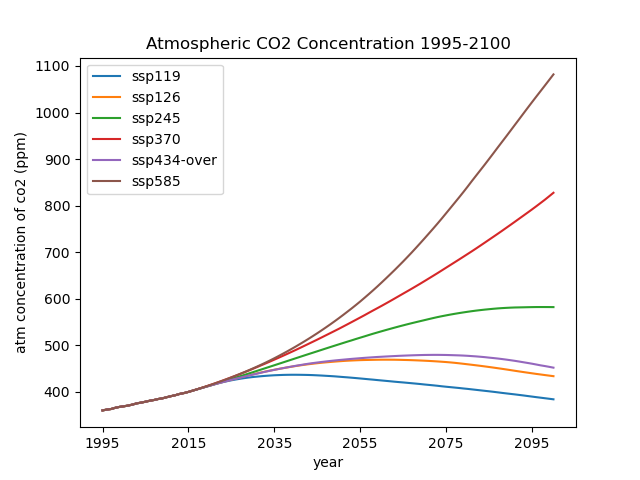

In [223]:
plt.figure()
plt.xlabel('year')
plt.ylabel('atm concentration of co2 (ppm)')
plt.title('Atmospheric CO2 Concentration 1995-2100')

plt.xticks(ticks=[0,20,40,60,80,100],labels=years[::20]);

for no,t_array in enumerate([xco2_119,xco2_126,xco2_245,xco2_370,xco2_434,xco2_585]):
    plt.plot(years,t_array,label=scenarios[no])

plt.legend()

## scenario xco2s and temps with applied beta and gamma values, this calculation:

![](sink_calc.png "Sink Calculation")

(https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter05.pdf, page 735)

- need to check that units are consistent

In [211]:

cmip6_modelmean_beta_land = float(beta_land[10][0:5]) # to turn from string into number, and remove uncertainty part
cmip6_modelmean_gamma_land = float(gamma_land[10][0:5])

In [219]:
del_carbon_land = cmip6_modelmean_beta_land * xco2_585 + cmip6_modelmean_gamma_land * temp585

<Axes: >

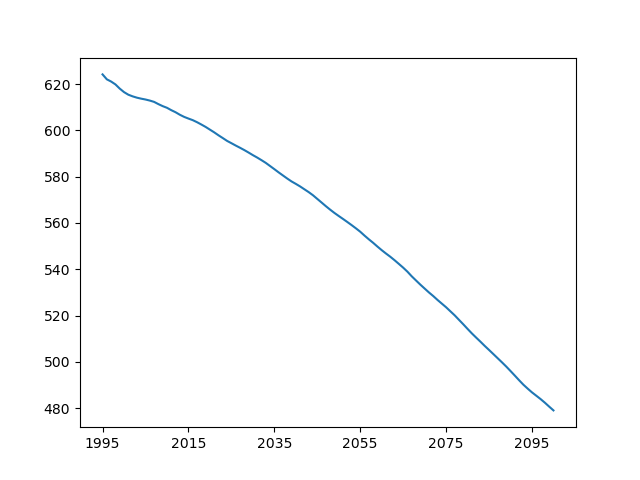

In [222]:
plt.figure()
plt.xlabel('year')
plt.ylabel('Δco2 (ppm)')
plt.title('Land Carbon Sink 1995-2100')
del_carbon_land.plot()